In [46]:
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
distributions = ['chisq','Normal','Poisson','Binomial','exponential']
mymean = 150


In [48]:
md = {}
mysize = (np.random.rand(100) * 1000).astype(int)
print(mysize.shape)

(100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


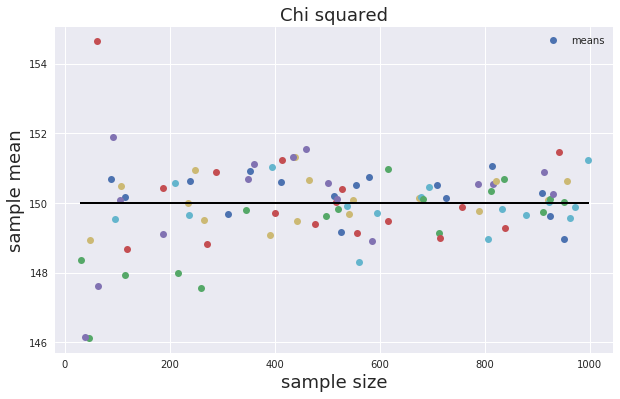

In [77]:
md['chisq'] = {}

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize = (10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        axchisq_mu_n.legend(['means'])


    Figure 1: As the sample size increase, the sample mean is more likely to be equal to the mean of the population.The sampling distribution of sample means approximates a normal distribution.
           

Text(0.5,1,'chisq')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


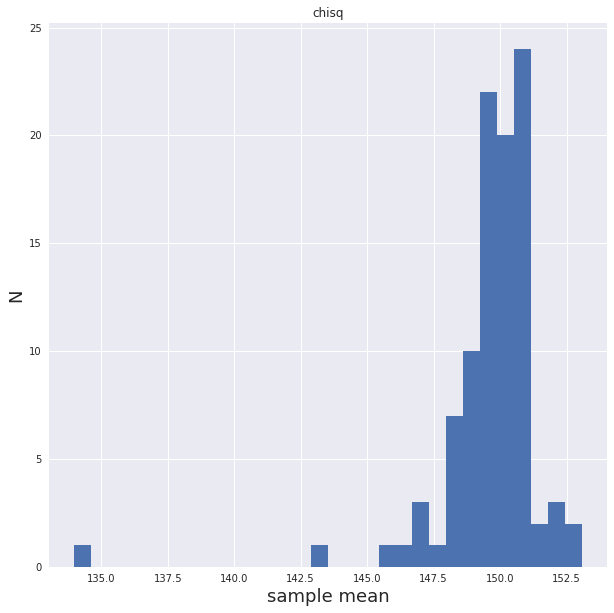

In [67]:
chisq_means = list(md['chisq']['means'].values())

pl.figure(figsize = (10, 10))
pl.hist(chisq_means, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('chisq')

     Figure 2: The distribution of sample means seems like a Normal distribution. 

(100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


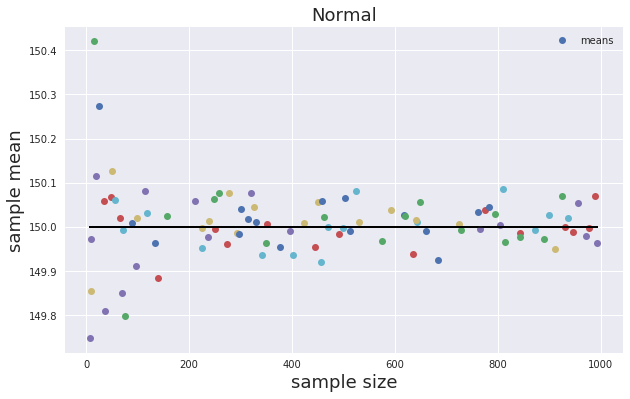

In [79]:
mysize = (np.random.rand(100) * 1000).astype(int)
print(mysize.shape)
md['Normal'] = {}

for n in mysize:
    md['Normal'][n] = np.random.normal(loc = mymean, scale = 1.0, size = n)
    
md['Normal']['means'] = {}
normal_mean = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Normal']:
    if not type(nn) == str:
        md['Normal']['means'][nn] = md['Normal'][nn].mean()
        #and plot it
        normal_mean.plot(nn, md['Normal']['means'][nn], 'o')
        normal_mean.set_xlabel('sample size', fontsize=18)
        normal_mean.set_ylabel('sample mean', fontsize=18)
        normal_mean.set_title('Normal', fontsize=18)
        normal_mean.legend(['means'])
        normal_mean.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')


  Figure 3: As the sample size increase, the sample mean is more likely to be equal to the mean of the population.
  According to the Central limit theorem: The sampling distribution of sample means approximates a normal distribution.

Text(0.5,1,'normal')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


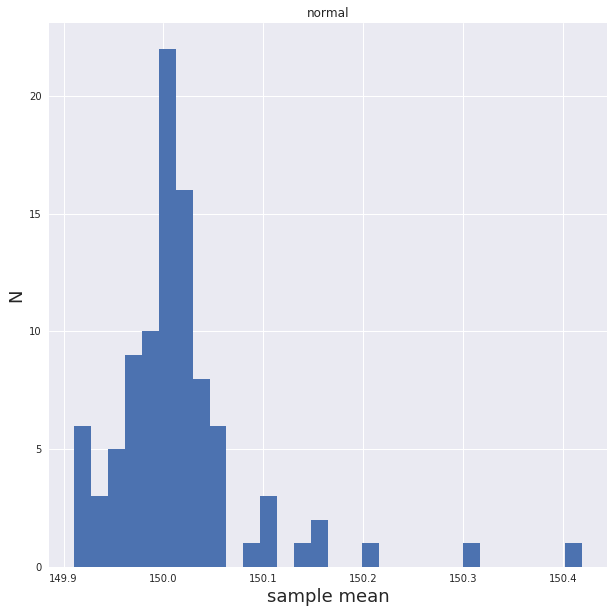

In [69]:
normal_means = list(md['Normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(normal_means,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('normal')

 Figure 4: The distribution of sample means seems like a Normal distribution. 

(100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


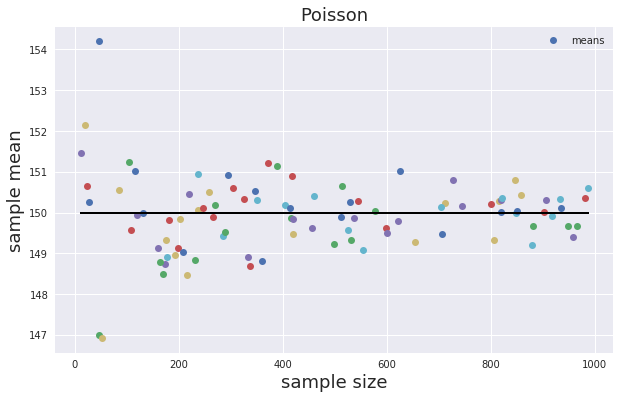

In [80]:
mysize = (np.random.rand(100) * 1000).astype(int)
print(mysize.shape)
md['Poisson'] = {}

for n in mysize:
    md['Poisson'][n] = np.random.poisson(lam = mymean, size = n)
    
md['Poisson']['means'] = {}
poisson_mean = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Poisson']:
    if not type(nn) == str:
        md['Poisson']['means'][nn] = md['Poisson'][nn].mean()
        #and plot it
        poisson_mean.plot(nn, md['Poisson']['means'][nn], 'o')
        poisson_mean.set_xlabel('sample size', fontsize=18)
        poisson_mean.set_ylabel('sample mean', fontsize=18)
        poisson_mean.set_title('Poisson', fontsize=18)
        poisson_mean.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        poisson_mean.legend(['means'])

  Figure 5: As the sample size increase, the sample mean is more likely to be equal to the mean of the population.
         The sampling distribution of sample means approximates a normal distribution.

Text(0.5,1,'Poisson')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


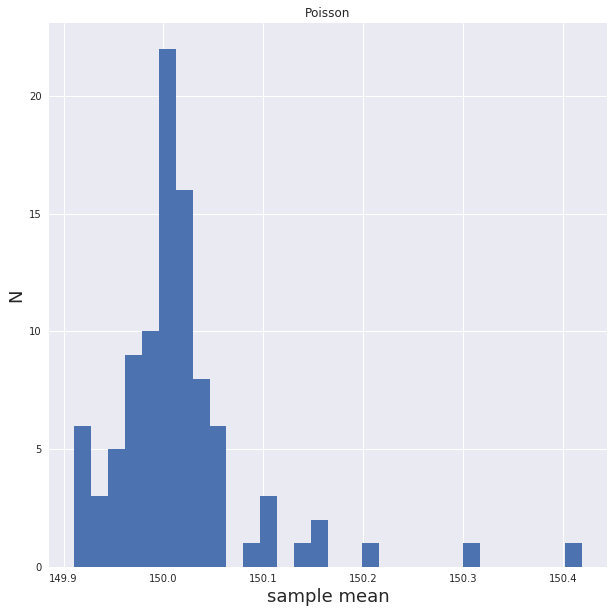

In [71]:
poisson_means = list(md['Poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(normal_means,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson')

In [84]:
 Figure 6: The distribution of sample means seems like a Normal distribution. 

SyntaxError: invalid syntax (<ipython-input-84-8bfc7fa4f6d6>, line 1)

(100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


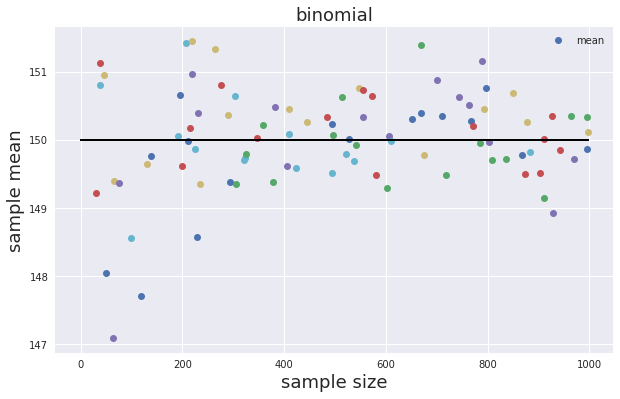

In [82]:
mysize = (np.random.rand(100) * 1000).astype(int)
print(mysize.shape)
md['binomial'] = {}

for n in mysize:
    md['binomial'][n] = np.random.binomial(max(mysize) + 1, mymean / (max(mysize) + 1), size = n)
    
md['binomial']['means'] = {}
binomial_mean = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        binomial_mean.plot(nn, md['binomial']['means'][nn], 'o')
        binomial_mean.set_xlabel('sample size', fontsize=18)
        binomial_mean.set_ylabel('sample mean', fontsize=18)
        binomial_mean.set_title('binomial', fontsize=18)
        binomial_mean.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        binomial_mean.legend(['mean'])

  Figure 7: As the sample size increase, the sample mean is more likely to be equal to the mean of the population.
        The sampling distribution of sample means approximates a normal distribution.

Text(0.5,1,'binomial')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


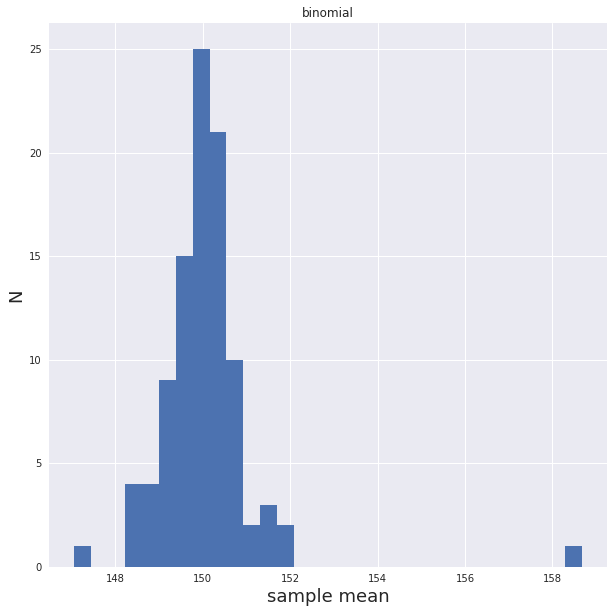

In [73]:
binomial_means = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(binomial_means,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('binomial')

In [85]:
 Figure 8: The distribution of sample means seems like a Normal distribution. 

SyntaxError: invalid syntax (<ipython-input-85-af40df0e7854>, line 1)

(100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


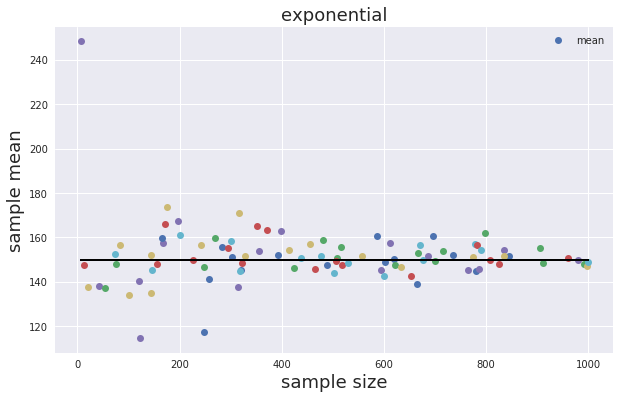

In [83]:
mysize = (np.random.rand(100) * 1000).astype(int)
print(mysize.shape)
md['exponential'] = {}

for n in mysize:
    md['exponential'][n] = np.random.exponential(scale = mymean, size = n)
    
md['exponential']['means'] = {}
exponential_mean = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exponential']:
    if not type(nn) == str:
        md['exponential']['means'][nn] = md['exponential'][nn].mean()
        #and plot it
        exponential_mean.plot(nn, md['exponential']['means'][nn], 'o')
        exponential_mean.set_xlabel('sample size', fontsize=18)
        exponential_mean.set_ylabel('sample mean', fontsize=18)
        exponential_mean.set_title('exponential', fontsize=18)
        exponential_mean.legend(['mean'])
        exponential_mean.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

  Figure 9: As the sample size increase, the sample mean is more likely to be equal to the mean of the population.
  The sampling distribution of sample means approximates a normal distribution.

Text(0.5,1,'exponential')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


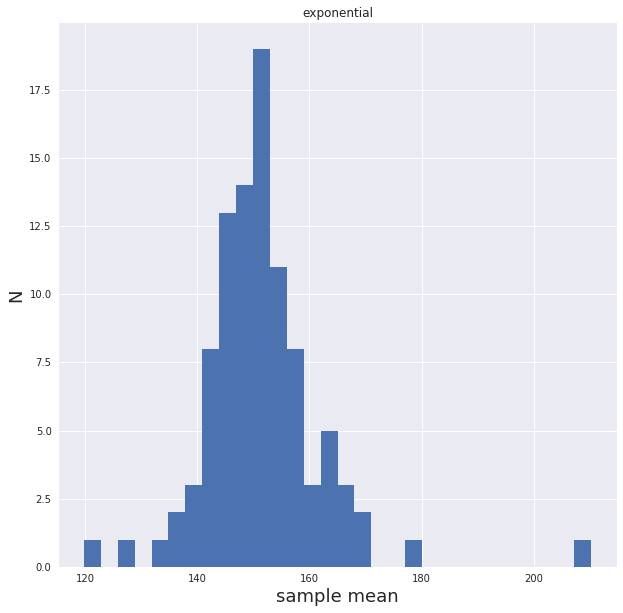

In [75]:
exponential_means = list(md['exponential']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(exponential_means,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('exponential')

 Figure 10: The distribution of sample means seems like a Normal distribution. 

### The distributions of all sample means (together for all distributions)

Text(0.5,1,'All Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


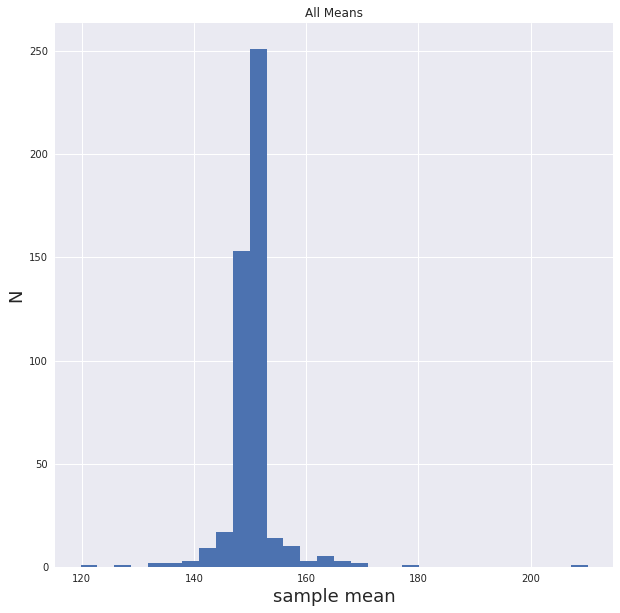

In [76]:
all_means = chisq_means + normal_means + poisson_means + binomial_means + exponential_means
pl.figure(figsize=(10, 10))
pl.hist(all_means,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('All Means')

 Figure 11: For all the distributions together, most of the sample mean = mymean, so the histogram looks very sharp in the middle. 